In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np
import j_py_sad_correlation as jps
import tifffile as tf

In [2]:
def v_fitting(y_1, y_2, y_3):
    # Fit using a symmetric 'V' function, to find the interpolated minimum for three datapoints y_1, y_2, y_3,
    # which are considered to be at coordinates x=-1, x=0 and x=+1
    if y_1 < y_2 or y_3 < y_2:
        return 0, 0

    if y_1 > y_3:
        x = 0.5 * (y_1 - y_3) / (y_1 - y_2)
        y = y_2 - x * (y_1 - y_2)
    else:
        x = 0.5 * (y_1 - y_3) / (y_3 - y_2)
        y = y_2 + x * (y_3 - y_2)


    return x, y

In [3]:
oog = OG.BasicOpticalGating.default()

Setting source to D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif
Loading reference sequence from D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\ref_seq.tif
Getting SADs
Getting phases


In [37]:
sorted = np.argsort(oog.phases)
sorted = np.delete(sorted, np.where(sorted == 1105))

In [38]:
print(sorted)
print(np.where(sorted == 1105))

[ 855  713 1103 ...  784  397  256]
(array([], dtype=int64),)


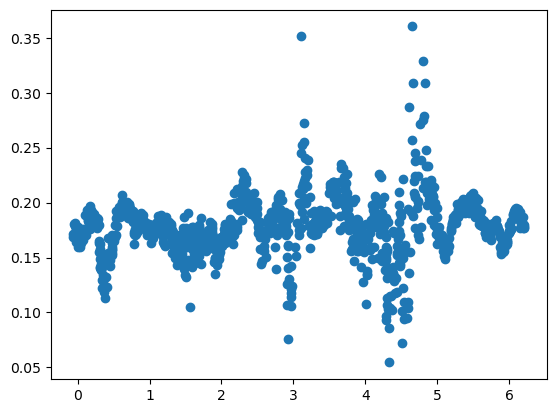

In [43]:
plt.scatter(oog.phases[1::], oog.delta_phases)
plt.show()

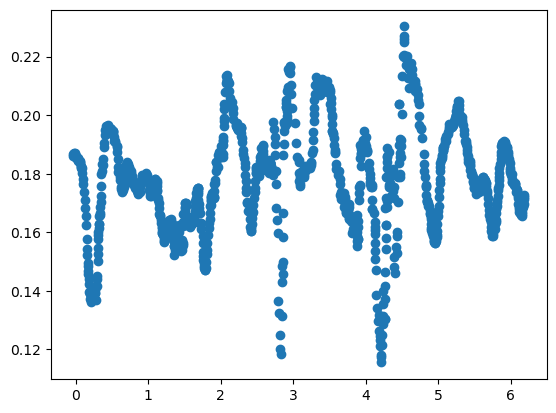

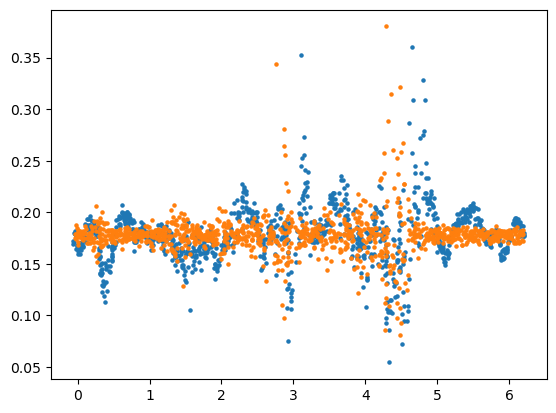

In [67]:
# Moving average of the sorted delta phases
window = 10
delta_phases_avg = np.convolve(oog.delta_phases[sorted], np.ones(window)/window, mode='valid')
phases_avg = oog.phases[sorted][int(window/2):int(window/2)+len(delta_phases_avg)]
# Plot it
plt.scatter(phases_avg, delta_phases_avg)
plt.show()
# Now subtract the moving average from the delta phases
delta_phases_avg = oog.delta_phases[sorted][int(window/2):int(window/2)+len(delta_phases_avg)] - delta_phases_avg
# Plot it
plt.scatter(oog.phases[1::], oog.delta_phases, s = 5)
plt.scatter(phases_avg, delta_phases_avg + np.mean(oog.delta_phases), s = 5)
plt.show()

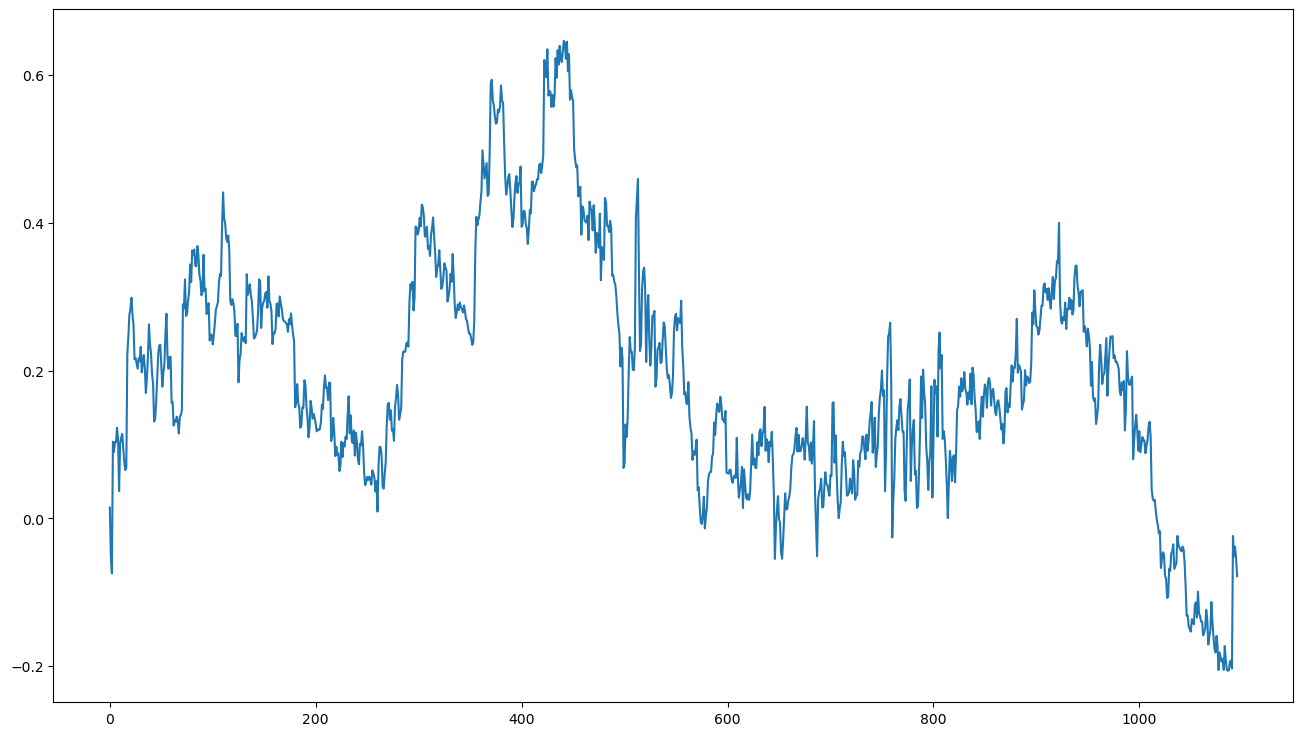

In [68]:
plt.figure(figsize = (16,9))
sorted2 = np.argsort(np.argsort(oog.phases[int(window/2):int(window/2)+len(delta_phases_avg)]))
plt.plot(np.cumsum(oog.delta_phases[int(window/2):int(window/2)+len(delta_phases_avg)][sorted2]) - np.cumsum(delta_phases_avg + np.mean(oog.delta_phases)))
plt.show()

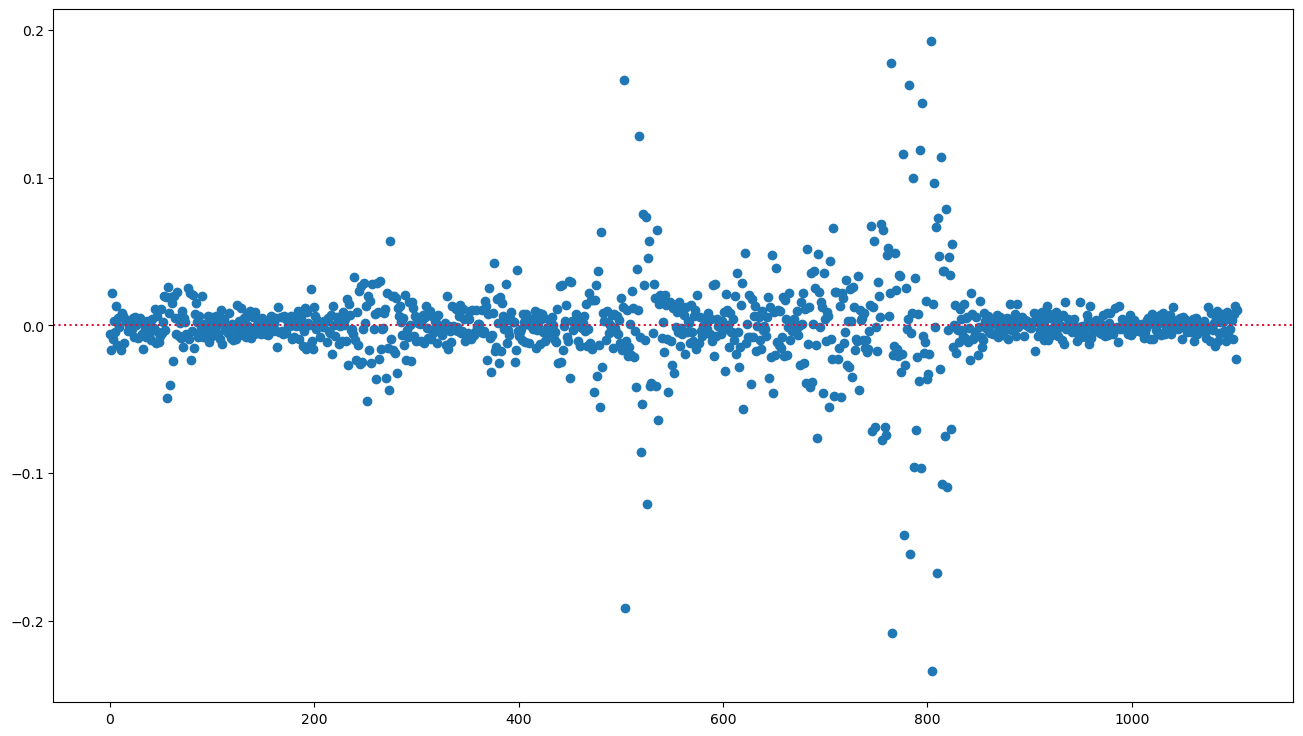

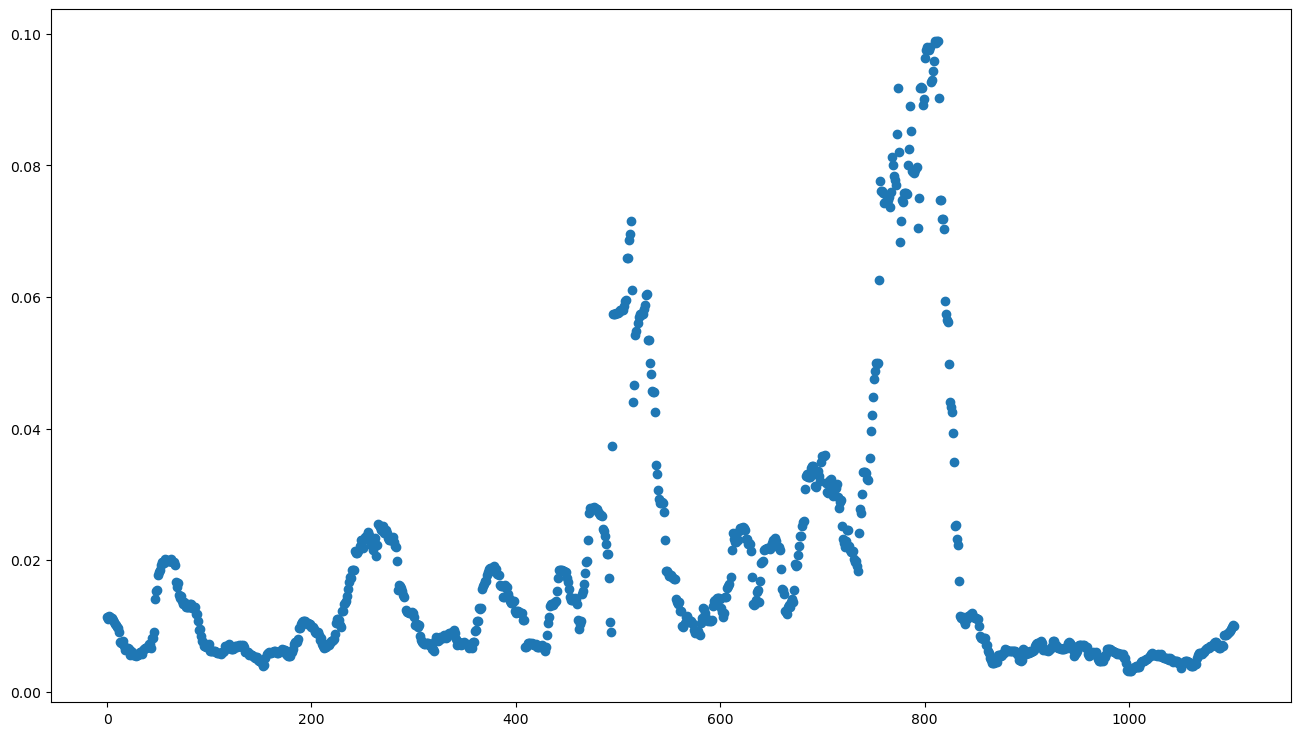

In [44]:
y = np.diff(np.array(oog.delta_phases)[sorted])
plt.figure(figsize = (16,9))
plt.scatter(range(len(y)), y)
plt.axhline(0, ls = ":", c = "crimson")
plt.show()

# Plot moving standard deviation of y
y_std = np.zeros(len(y))
for i in range(len(y)):
    y_std[i] = np.std(y[max(0, i-10):min(len(y), i+10)])
plt.figure(figsize = (16,9))
plt.scatter(range(len(y)), y_std)
plt.show()

In [5]:
print(np.where((oog.delta_phases > np.mean(oog.delta_phases))))

(array([   0,    2,    3,    4,    5,    7,    9,   11,   12,   13,   15,
         21,   22,   23,   26,   27,   28,   29,   32,   36,   38,   39,
         40,   41,   45,   47,   48,   49,   50,   57,   58,   59,   62,
         64,   65,   67,   70,   71,   73,   74,   75,   78,   80,   83,
         84,   86,   92,   93,   94,   95,   98,   99,  100,  101,  102,
        103,  107,  109,  110,  111,  114,  116,  118,  119,  120,  121,
        122,  128,  129,  130,  131,  133,  134,  135,  136,  138,  140,
        141,  142,  144,  145,  146,  149,  151,  153,  154,  155,  163,
        164,  165,  166,  167,  169,  170,  173,  176,  177,  179,  180,
        181,  182,  184,  186,  188,  189,  191,  192,  198,  199,  200,
        201,  202,  203,  204,  205,  206,  207,  208,  211,  212,  214,
        215,  216,  218,  219,  221,  223,  224,  225,  233,  234,  235,
        236,  238,  239,  240,  241,  243,  248,  250,  251,  252,  254,
        255,  257,  259,  262,  268,  269,  272,  

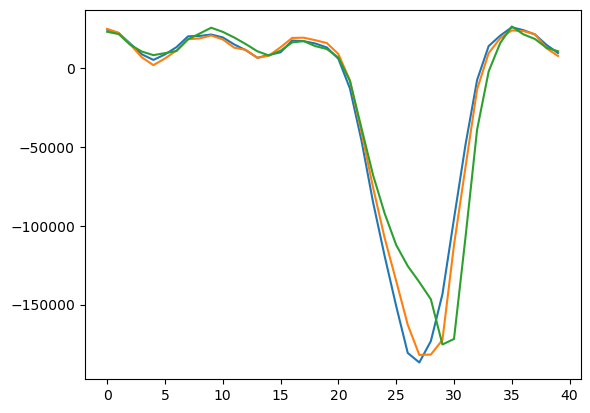

In [6]:
plt.plot(oog.sads[422] - np.mean(oog.sads, axis = 0))
plt.plot(oog.sads[423] - np.mean(oog.sads, axis = 0))
plt.plot(oog.sads[424] - np.mean(oog.sads, axis = 0))
plt.show()

In [7]:
print(oog.sequence_manager.reference_indices)

None


In [8]:
print(oog.sequence_manager.reference_period)

35.77851226661945


In [9]:
data = tf.imread(r"D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif")

In [10]:
sads = []
for i in range(len(data)):
    sads.append(np.sum(np.abs(data[i].astype(np.int32) - oog.sequence_manager.reference_sequence[2].astype(np.int32))))

In [11]:
sads = -np.array(sads)
sads -= np.min(sads)

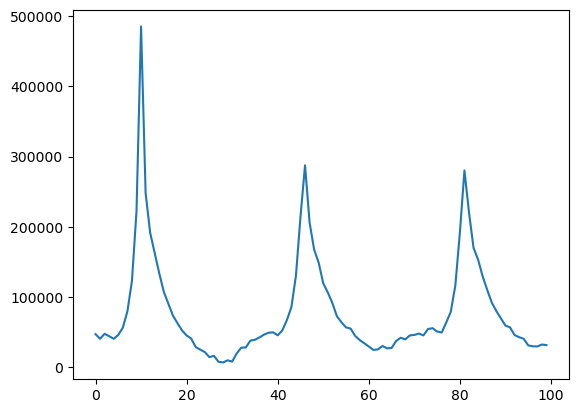

In [12]:
plt.plot(sads[0:100])
plt.show()

In [13]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(sads, height = 200000, distance = 10)
print(np.array(peaks))

[  10   46   81  117  152  187  222  258  293  328  363  399  433  468
  503  538  573  608  644  679  714  750  786  821  856  891  927  962
  997 1033 1069 1104]


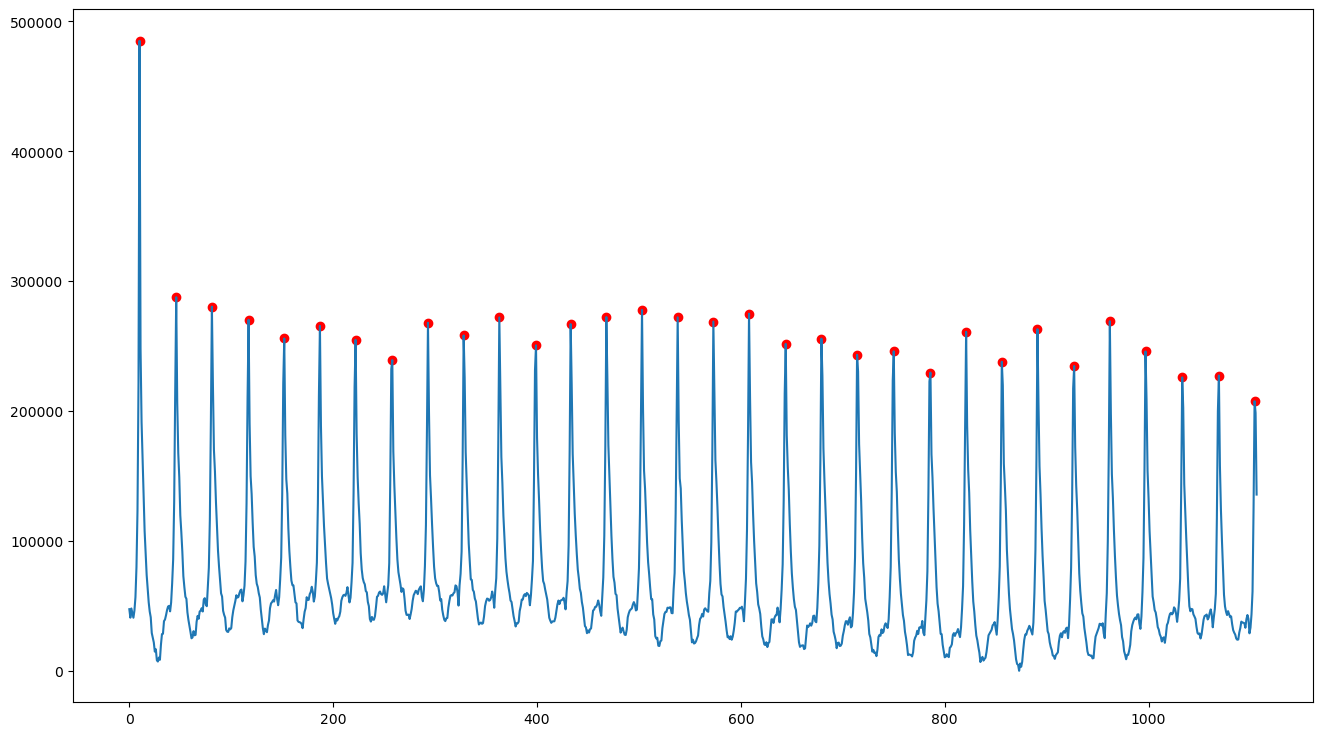

In [14]:
plt.figure(figsize=(16,9))
plt.plot(sads)
for peak in peaks:
    plt.scatter(peak, sads[peak], c = "r")
plt.show()

Get frame and subframe locations of each possible reference sequence with rough matching start frame

In [15]:
reference_indices = []
reference_periods = []

for i in range(1, len(peaks) - 2):
    first_subframe = v_fitting(-sads[peaks[i] - 1], -sads[peaks[i]], -sads[peaks[i] + 1])
    last_subframe = v_fitting(-sads[peaks[i + 1] - 1], -sads[peaks[i + 1]], -sads[peaks[i + 1] + 1])

    reference_indices.append((peaks[i] - 2, peaks[i + 1] + 2))
    reference_periods.append((peaks[i + 1] + last_subframe[0]) - (peaks[i] + first_subframe[0]))


In [16]:
print(reference_indices)
print(reference_periods)

[(44, 83), (79, 119), (115, 154), (150, 189), (185, 224), (220, 260), (256, 295), (291, 330), (326, 365), (361, 401), (397, 435), (431, 470), (466, 505), (501, 540), (536, 575), (571, 610), (606, 646), (642, 681), (677, 716), (712, 752), (748, 788), (784, 823), (819, 858), (854, 893), (889, 929), (925, 964), (960, 999), (995, 1035), (1031, 1071)]
[35.21131577614387, 35.71443279603558, 34.85795852536532, 35.113204172982506, 34.90267250926743, 35.79898359940245, 35.532498284775556, 35.25054455918854, 34.88797032176802, 35.4151102076961, 34.628247941195866, 35.00686420791624, 34.738015670591096, 34.958313911631365, 35.26933326691619, 34.91947136770557, 35.61785737980358, 35.57320538198485, 35.083494663983174, 35.24811319681237, 35.876132718720214, 35.441533319397536, 35.40639907875459, 34.810921510239154, 35.424157328026695, 35.50180666982169, 35.15862497146759, 36.06910211931813, 35.331701346564614]


In [17]:
phases = []
for i in range(len(reference_indices)):
    oog2 = OG.BasicOpticalGating()
    oog2.sequence_manager.set_source(r"D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif")
    oog2.sequence_manager.set_reference_sequence_by_indices([reference_indices[i][0], reference_indices[i][1]])
    oog2.sequence_manager.reference_period = reference_periods[i]
    oog2.run()
    phases.append(oog2.unwrapped_phases)



Setting source to D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif
Getting SADs
Getting phases
Setting source to D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif
Getting SADs
Getting phases
Setting source to D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif
Getting SADs
Getting phases
Setting source to D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif
Getting SADs
Getting phases
Setting source to D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif
Getting SADs
Getting phases
Setting source to D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif
Getting SADs
Getting phases
Setting source to D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif
Getting SADs
Getting phases
Setting source to D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif
Getting SADs
Getting phases
Setting 

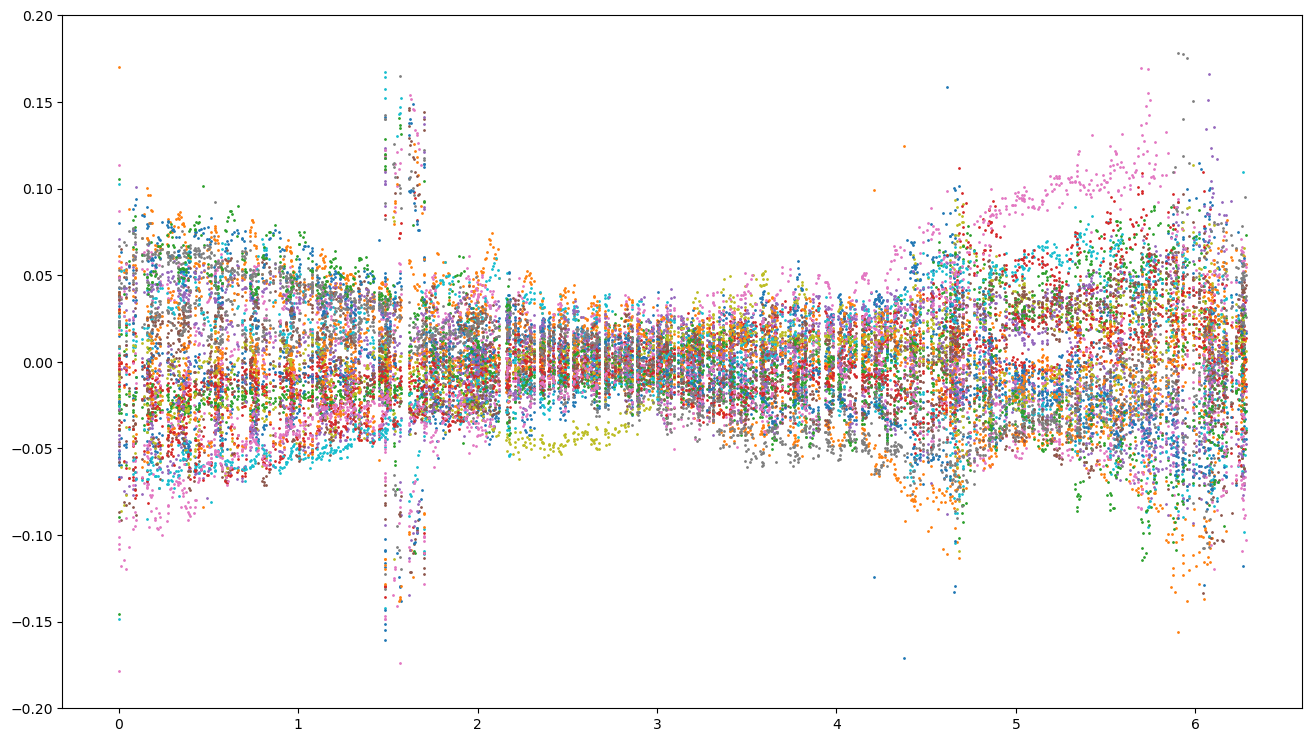

In [18]:
plt.figure(figsize=(16,9))
for i in range(0, len(phases) - 1):
    plt.scatter(phases[0] % (2 * np.pi), phases[i] - phases[i + 1] - np.mean(phases[i] - phases[i + 1]), s = 1)
plt.ylim(-0.2, 0.2)
plt.show()